In [1]:
import numpy as np
import pandas as pd
import psycopg2 as pg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import csv
data=pd.read_csv('/mnt/data/shared/workingData/iefp_events_data2.csv')
#remove all application ids that does not start with an application
remove_id=data.groupby("application_id").first().event_type!="application"
remove_id=remove_id[remove_id==True]
data=data[~data['application_id'].isin(remove_id.index.values)]
interesting_types=["application","convocation","interviews"]
data=data[data.event_type.isin(interesting_types)]#["event_type"]("application" "convocation")]
remove_data=data[(data["event_type"]=="convocation")& (data["event_category"]!="OFERTA")]
data=data[~data.isin(remove_data)]
data=data[pd.notnull(data['ute_id'])]
data.groupby("event_type")["event_type"].value_counts()
print "number of applications"
len(data["application_id"].unique())

number of applications


125029

In [3]:
data.groupby("event_type")["event_type"].value_counts()
applications=data[data["event_type"]=="application"]
#print applications["event_category"].unique()
print "breakdown of application reasons"
interestingGroups=["DESEMPREGADO-NOVO EMPREGO","DESEMPREGADO-1º EMPREGO"]
#employedApplications
applicationsEmployed=applications[applications["event_category"].isin(interestingGroups)]
print "number of unique id in the applications",len(applications["ute_id"].unique())
applications.groupby("event_type")["event_category"].value_counts()
print "Number of unemployed looking for job"
unemployed=applications.groupby("event_type")["event_category"].value_counts()[0]+applications.groupby("event_type")["event_category"].value_counts()[1]
print unemployed
print "Number of non unemployed looking for job"
employed=applications.groupby("event_type")["event_category"].value_counts()[2]+applications.groupby("event_type")["event_category"].value_counts()[3]
print employed
print "Percentage of employed people people in the applications"
print employed*100.0/(unemployed+employed)
print "total number of applications"
print unemployed+employed

applications.groupby("event_type")["event_category"].value_counts()

breakdown of application reasons
number of unique id in the applications 65523
Number of unemployed looking for job
119926
Number of non unemployed looking for job
5103
Percentage of employed people people in the applications
4.08145310288
total number of applications
125029


event_type   event_category           
application  DESEMPREGADO-NOVO EMPREGO    106826
             DESEMPREGADO-1º EMPREGO       13100
             EMPREGADO                      4548
             EMPREGADO A TEMPO PARCIAL       555
Name: event_category, dtype: int64

In [4]:
print "find the number of convocations"
print data.groupby("event_type")["event_type"].value_counts()
print "numer of individual applications that gets a convocation"
offers=data[data["event_type"]=="convocation"]
len(offers["application_id"].unique())

find the number of convocations
event_type   event_type 
application  application    125029
convocation  convocation     55977
interviews   interviews     118979
Name: event_type, dtype: int64
numer of individual applications that gets a convocation


33034

Other                                 0.008307
ANULADA                               0.026261
NÃO COMPARECEU INJUSTIFICADAMENTE    0.069600
NÃO APRESENTADO                      0.213463
APRESENTADO                           0.682370
Name: event_result, dtype: float64


/opt/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


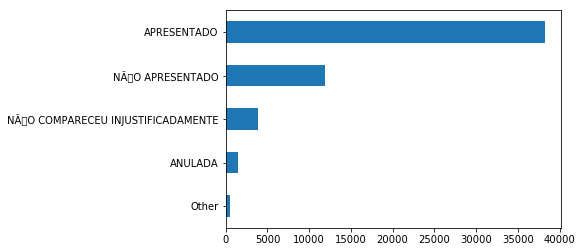

In [5]:
offers=data[data["event_type"]=="convocation"]
offers.groupby("event_result")["event_result"].value_counts(sort=True,ascending=False)
offers["event_result"].value_counts(sort=True)
interestingOffers=["APRESENTADO","NÃO APRESENTADO","NÃO COMPARECEU INJUSTIFICADAMENTE","ANULADA"]
these=offers.event_result.isin(interestingOffers)
offers[offers.event_result.isin(interestingOffers)]
offers.event_result[~offers.event_result.isin(interestingOffers)]="Other"
#print offers
print offers.event_result.value_counts(sort=True,ascending=True,normalize=True)
offers.event_result.value_counts(sort=True,ascending=True).plot(kind='barh')


Total number of interviews
118979
Total number of users getting an interview
48815


/opt/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


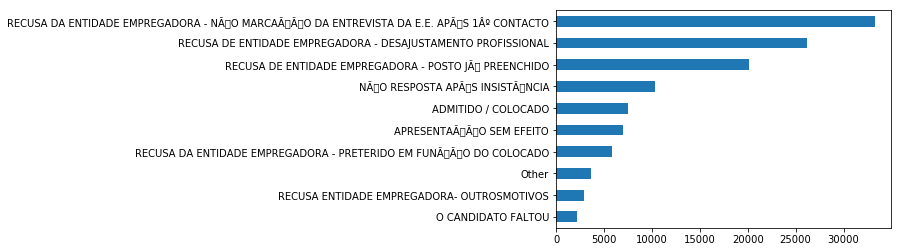

In [6]:
data.head(100)
interviews=data[data["event_type"]=="interviews"]
print "Total number of interviews"
print interviews.shape[0]
print "Total number of users getting an interview"
print len(interviews["application_id"].unique())
interestingResults=["RECUSA DA ENTIDADE EMPREGADORA - NÃO MARCAÃÃO DA ENTREVISTA DA E.E. APÃS 1Âº CONTACTO",
                    "RECUSA DE ENTIDADE EMPREGADORA - DESAJUSTAMENTO PROFISSIONAL",
                    "RECUSA DE ENTIDADE EMPREGADORA - POSTO JÃ PREENCHIDO",
                    "NÃO RESPOSTA APÃS INSISTÃNCIA","ADMITIDO / COLOCADO",
                     "APRESENTAÃÃO SEM EFEITO",
                     "RECUSA DA ENTIDADE EMPREGADORA - PRETERIDO EM FUNÃÃO DO COLOCADO",
                   "RECUSA ENTIDADE EMPREGADORA- OUTROSMOTIVOS",
                   "O CANDIDATO FALTOU"]

interviews[interviews.event_result.isin(interestingResults)]
interviews.event_result[~interviews.event_result.isin(interestingResults)]="Other"

interviews.groupby("event_result")["event_result"].value_counts(sort=True,ascending=False)
interviews["event_result"].value_counts(sort=True)
interviews.event_result.value_counts(sort=True,ascending=True).plot(kind='barh')



In [7]:
print "Number of unique users getting an interview and being admidded"
uniqueInterviews=interviews[interviews["event_result"]=="ADMITIDO / COLOCADO"]
len(uniqueInterviews["application_id"].unique())

Number of unique users getting an interview and being admidded


7434

In [8]:
#Trying to estimate the amount of offers that does not show up in th 
#numberOfConvocations=0
counter=0
interviewsRecorded=0
offers=0
checkNext=False
print "antall",data.shape
for index,row in data.iterrows():
    if checkNext==True:
        checkNext=False
        if row["event_type"]=="interviews":
            interviewsRecorded+=1
    if row["event_type"]=="convocation" and row["event_result"]=="APRESENTADO":
        offers+=1
        checkNext=True
print "offers",offers
print "interviews after offers",interviewsRecorded
print "estimated number of interviews recorded",interviewsRecorded*100.0/offers
#    theSeries=group["event_type"]
#    theSeries.index=range(len(group))
#    if len(theSeries)>1 and theSeries.loc[1]=="convocation":
#        numberOfConvocations+=1
#    break
#print numberOfConvocations
    #if theSeries.loc[1]:
    #    numberOfConvocations+=1

antall (299985, 7)
offers 38197
interviews after offers 33120
estimated number of interviews recorded 86.7083802393


In [26]:
import math

def nanToNintyNine(toConvert):
    whereAreNan=np.isnan(toConvert)
    toConvert[whereAreNan]=99999
    toConvert=toConvert.astype(int)
    return toConvert

def convertToMonths(yearMonth):
    if yearMonth==9999:
        return 99999
    else:
        return int(str(yearMonth)[0:4])*12+int(str(yearMonth)[4:6])
         
grouped=data.groupby("application_id")
counter=0
applicationDict={}
applicationsFrame=pd.DataFrame(columns=["application_id","applicationDate","firstInterview"])
applicationsFrame.head()
#applicationsDates=pd.DataFrame()
numberOfUniqueApplications=len(grouped)
#numberOfUniqueApplications=111
applicationID=np.array([np.nan]*numberOfUniqueApplications)
applicationDates=np.array([np.nan]*numberOfUniqueApplications)
firstInterview=np.array([np.nan]*numberOfUniqueApplications)
sucsess=np.array([np.nan]*numberOfUniqueApplications)
allInterviews=[np.nan]*numberOfUniqueApplications
index=0
foundFirstInterview=False
foundSucsessInterview=False
dictOfInterviews={}
timeToInterview=[]
for key, group in grouped:
    group.head()
    applicationID[counter]=group.iloc[0]["application_id"]
    applicationDates[counter]=group[group["event_type"]=="application"]["date"].min()
    firstInterview[counter]= group[group["event_type"]=="interviews"]["date"].min()
    allInterviews[counter]=group[group["event_type"]=="interviews"]["date"].tolist()
    #print "what type",type(group[group["event_type"]=="interviews"]["date"])
    #dictOfInterviews[group[group["event_type"]=="application"]["application_id"].min()]=group[group["event_type"]=="interviews"]["date"].tolist()    
    sucsess[counter]=group[(group["event_type"]=="interviews") 
                & (group["event_result"]=="ADMITIDO / COLOCADO")]["date"].min()
    counter+=1
    #print counter
    if counter>3000:
        break

#whereAreNan=isnan(applicationDates)
#applicationsDates[whereAreNan]=-99
#whereAreNan=isnan(firstInterview)
#firstInterview[whereAreNan]=-99
#timeToFirstInterview=str(firstInterview)[0:4]
#print timeToFirstInterview
#int(str(x)[0:4]))
#timeToPlaced=applicationDates-sucsess

timeToInterview=[]
for i in range(len(allInterviews)):
    if True in np.isnan(allInterviews[i]):
        continue
    print allInterviews[i]
    for k in allInterviews[i]: 
        print "her", k


applicationDates=nanToNintyNine(applicationDates)
firstInterview=nanToNintyNine(firstInterview)
sucsess=nanToNintyNine(sucsess)
convertToMonths = np.vectorize(convertToMonths)
#print "does it containe nan",np.isnan(applicationDates).any()
convertToMonths(applicationDates)
timeToFirstInterview=convertToMonths(firstInterview)-convertToMonths(applicationDates)
timeToJob=convertToMonths(sucsess)-convertToMonths(applicationDates)
#print convertToMonths(firstInterview)-
#-convertToMonths(applicationDates)
timeToInterview=[]
counter=0

#for key in dictOfInterviews:
#    counter+=1
#    print counter
#    #print key,dictOfInterviews[key]
#    applicationTime=convertToMonths(key)
#    if len(dictOfInterviews[key])!=0:
#        interviewTime=convertToMonths(dictOfInterviews[key])
#        #interviewTime=interviewTime.tolist()
#        applicationTime=applicationTime.tolist()
#        #print type(interviewTime)
#        #print type(applicationTime)
#        time=(interviewTime-applicationTime).tolist()
#        timeToInterview.extend(time)
#print timeToInterview





applicationsFrame["application_id"]=pd.Series(applicationID).values
applicationsFrame["applicationDate"]=pd.Series(applicationDates).values
applicationsFrame["firstInterview"]=pd.Series(firstInterview).values
applicationsFrame.ix[applicationsFrame.firstInterview == 99999, 'firstInterview'] = np.nan
applicationsFrame["firstJob"]=pd.Series(sucsess).values
applicationsFrame.ix[applicationsFrame.firstJob == 99999, 'firstJob'] = np.nan
applicationsFrame["timeToInterview"]=pd.Series(timeToFirstInterview).values
applicationsFrame.ix[applicationsFrame.timeToInterview > 70000, 'timeToInterview'] = np.nan
applicationsFrame["timeToJob"]=pd.Series(timeToJob).values
applicationsFrame.ix[applicationsFrame.timeToJob>70000,"timeToJob"]=np.nan
applicationsFrame.describe()
applicationsFrame=applicationsFrame[:3000]
plt.figure()
plt.hist(timeToInterview,bins=20,range=[-0.5,19.5])
plt.show()
#print applicationsFrame["timeToInterview"].dropna()
applicationsFrame["timeToInterview"].dropna().hist(bins=20,range=[-0.5,19.5])
plt.figure()
applicationsFrame["timeToJob"].dropna().hist(bins=20,range=[-0.5,19.5])


applicationsFrame=applicationsFrame.dropna()
(applicationsFrame["timeToInterview"]==applicationsFrame["timeToJob"]).value_counts()
#applicationsFrame["isFirst"]=np.where(applicationsFrame["timeToInterview"]==applicationsFrame["timeToJob"])
#print applicationsFrame



#drop all columns that contains nan

#check how many columns has first interview same as first sucsessful interview



#applicationsFrame["timeToJOb"].dropna()

#print_histograms(applicationsFrame)

#interviews[interviews.event_result.isin(interestingResults)]
#interviews.event_result[~interviews.event_result.isin(interestingResults)]="Other"


#apply(lambda x: int(str(x)[0:4]))
#applicationsFrame["TimeToFirstInterview"]=applicationsFrame["firstInterview"].apply(lambda x:None if x == -99 else int(str(x)[0:4]))*12+applicationsFrame["firstInterview"].apply(lambda x:int(str(x)[4:6]))#-applicationsFrame["applicationDate"].apply(lambda x:int(str(x)[0:4]))*12-applicationsFrame["applicationDate"].apply(lambda x:int(str(x)[4:6]))

                                                            
                            #applicationsFrame["applicationDate"].apply(lambda x:int(str(x)[0:4]))*12



#applicationsFrame.head(100)

#int(str(x)[0:4]))



[]
[201305.0, 201405.0]
her 201305.0
her 201405.0
[201102.0]
her 201102.0
[201210.0]
her 201210.0
[200711.0]
her 200711.0
[]
[]
[]
[201406.0]
her 201406.0
[201603.0, 201606.0, 201611.0]
her 201603.0
her 201606.0
her 201611.0
[]
[201210.0]
her 201210.0
[]
[201405.0, 201406.0, 201407.0]
her 201405.0
her 201406.0
her 201407.0
[201410.0]
her 201410.0
[201704.0]
her 201704.0
[]
[]
[]
[]
[]
[]
[]
[201505.0]
her 201505.0
[]
[]
[201212.0, 201212.0, 201312.0, 201405.0, 201407.0, 201407.0]
her 201212.0
her 201212.0
her 201312.0
her 201405.0
her 201407.0
her 201407.0
[]
[]
[]
[201009.0, 201011.0, 201101.0, 201102.0]
her 201009.0
her 201011.0
her 201101.0
her 201102.0
[201110.0]
her 201110.0
[201203.0, 201204.0, 201204.0, 201206.0]
her 201203.0
her 201204.0
her 201204.0
her 201206.0
[201208.0, 201209.0, 201209.0, 201210.0, 201210.0]
her 201208.0
her 201209.0
her 201209.0
her 201210.0
her 201210.0
[201307.0, 201307.0, 201307.0]
her 201307.0
her 201307.0
her 201307.0
[]
[201703.0]
her 201703.0
[2014

her 200712.0
[]
[200904.0]
her 200904.0
[]
[]
[201011.0, 201011.0, 201103.0]
her 201011.0
her 201011.0
her 201103.0
[200910.0, 200910.0, 200911.0, 200911.0, 200912.0]
her 200910.0
her 200910.0
her 200911.0
her 200911.0
her 200912.0
[]
[201409.0, 201410.0]
her 201409.0
her 201410.0
[201604.0]
her 201604.0
[]
[201104.0, 201105.0, 201107.0]
her 201104.0
her 201105.0
her 201107.0
[]
[201006.0]
her 201006.0
[]
[]
[200710.0, 200710.0]
her 200710.0
her 200710.0
[200805.0, 200806.0]
her 200805.0
her 200806.0
[201004.0, 201004.0, 201005.0, 201005.0, 201005.0, 201007.0]
her 201004.0
her 201004.0
her 201005.0
her 201005.0
her 201005.0
her 201007.0
[201105.0, 201105.0, 201106.0, 201107.0]
her 201105.0
her 201105.0
her 201106.0
her 201107.0
[201302.0]
her 201302.0
[]
[]
[]
[]
[201607.0, 201607.0]
her 201607.0
her 201607.0
[201701.0, 201702.0, 201704.0, 201704.0]
her 201701.0
her 201702.0
her 201704.0
her 201704.0
[]
[]
[]
[]
[200701.0, 200702.0, 200702.0]
her 200701.0
her 200702.0
her 200702.0
[200

her 201003.0
her 201004.0
[201509.0]
her 201509.0
[]
[]
[201102.0, 201107.0, 201108.0, 201108.0, 201109.0, 201109.0, 201201.0, 201201.0, 201208.0]
her 201102.0
her 201107.0
her 201108.0
her 201108.0
her 201109.0
her 201109.0
her 201201.0
her 201201.0
her 201208.0
[]
[]
[]
[200805.0, 200806.0]
her 200805.0
her 200806.0
[200903.0, 200904.0, 200905.0, 200907.0, 200907.0, 200907.0, 200910.0]
her 200903.0
her 200904.0
her 200905.0
her 200907.0
her 200907.0
her 200907.0
her 200910.0
[]
[201512.0]
her 201512.0
[201007.0]
her 201007.0
[]
[]
[]
[]
[201206.0, 201208.0]
her 201206.0
her 201208.0
[]
[201503.0]
her 201503.0
[200809.0]
her 200809.0
[]
[]
[]
[]
[]
[]
[]
[]
[200902.0]
her 200902.0
[200905.0, 200909.0, 201002.0]
her 200905.0
her 200909.0
her 201002.0
[]
[201108.0, 201203.0, 201205.0, 201206.0, 201206.0, 201210.0, 201301.0, 201303.0, 201304.0, 201502.0, 201504.0]
her 201108.0
her 201203.0
her 201205.0
her 201206.0
her 201206.0
her 201210.0
her 201301.0
her 201303.0
her 201304.0
her 2015

her 201310.0
her 201403.0
[]
[]
[201004.0]
her 201004.0
[200808.0, 200912.0]
her 200808.0
her 200912.0
[]
[]
[201703.0]
her 201703.0
[201006.0, 201008.0]
her 201006.0
her 201008.0
[]
[]
[]
[]
[]
[200710.0, 200712.0, 200801.0, 200802.0]
her 200710.0
her 200712.0
her 200801.0
her 200802.0
[]
[201207.0]
her 201207.0
[]
[]
[]
[]
[]
[201501.0, 201502.0]
her 201501.0
her 201502.0
[201607.0]
her 201607.0
[201405.0, 201412.0, 201512.0]
her 201405.0
her 201412.0
her 201512.0
[201606.0, 201607.0, 201610.0, 201611.0, 201611.0, 201701.0]
her 201606.0
her 201607.0
her 201610.0
her 201611.0
her 201611.0
her 201701.0
[]
[200807.0, 201110.0]
her 200807.0
her 201110.0
[200904.0, 200905.0, 200907.0, 200908.0, 200911.0]
her 200904.0
her 200905.0
her 200907.0
her 200908.0
her 200911.0
[201106.0, 201111.0, 201208.0, 201210.0]
her 201106.0
her 201111.0
her 201208.0
her 201210.0
[201310.0, 201401.0, 201402.0, 201411.0, 201503.0]
her 201310.0
her 201401.0
her 201402.0
her 201411.0
her 201503.0
[200708.0, 2007

TypeError: argument of type 'numpy.bool_' is not iterable

In [21]:
#Find all rows with the that contains an application
hasApplication=data[data["event_type"]=="application"]
#Find all unique user id that has an aplication
id_with_application=hasApplication.ute_id.unique()
#select only rows that has a user id that is also found in an application
selected_data=data[data['ute_id'].isin(id_with_application)]
#see how many of the different event types we have now. 
selected_data.groupby("event_type").count()


,ute_id,Date,index
event_type,,,
application,133024,133024,133024
cancellation,112514,112514,112514
category_change,115101,115101,115101
convocation,250225,250225,250225
interviews,125966,125966,125966
